# Basic Image Classification

Following tenserflow tutorial: *Basic classification: Classify images of clothing*

With my own notes.

### Load libraries and dataset

Uses clothing dataset instead of classic digit MNIST dataset.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [29]:
#dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #numpy arrays

train_images.shape

(60000, 28, 28)

Images labled 1-10 for a different category of clothing in each category.

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Exploring / displaying the dataset

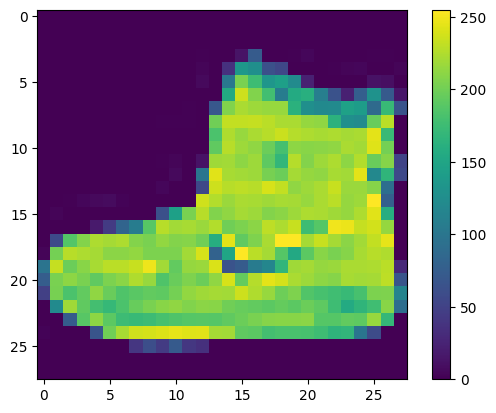

In [14]:
#show first image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Probably in the last category "ankle boot"

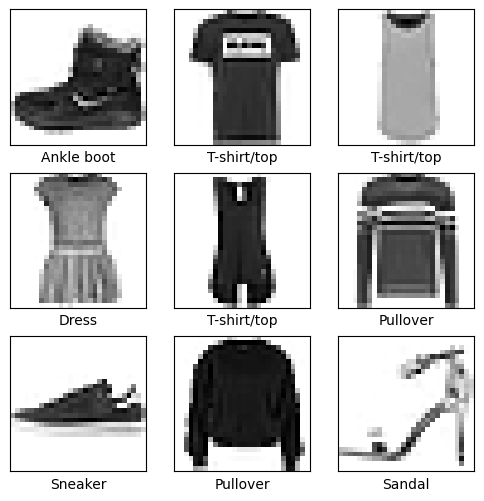

In [25]:
#show first 9
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Building a classification model


Sequential Layers notes
* **Flatten**: Flattens matrix data into vector
* **Dense**: Fully connnected NN network layer with parameters learned during training. 


Flattened Input -> 128 neurons -> 10 logit output array

**Compiling the model** (model.compile)

In [30]:
#scale images from 255 grayscale range to between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [31]:
#setting up neural network layers
model = tf.keras.Sequential([
    #flatten 2d images into 1d vector
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    #Dense NN layers. RELU activation function max{0, x}
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [32]:
model.compile(optimizer='adam', #example from regression: gradient descent
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #example from regression: MSE
              metrics=['accuracy'])


### Training the model

Notes: 
* Epochs are number of times the model optimizer iterates through the training dataset. 

**"Feed" model**  (model.fit)

In [33]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4999 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3764 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3379 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3142 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2949 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2814 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2682 - accuracy: 0.8992
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2584 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2488 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

**Evaluate Accuracy** (model.evaluate)

In [34]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\ntest accuracy: ', test_acc)

313/313 - 1s - loss: 0.3538 - accuracy: 0.8735 - 738ms/epoch - 2ms/step

test accuracy:  0.8734999895095825


Test accuracy **<** training accuracy. Due to overfitting.

### Making predictions


In [36]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]) #using softmax, output interpretable probabilities instead of logits

In [38]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


**Look at first prediction**

In [40]:
#array of 10 probs
predictions[0]

array([2.0676480e-06, 2.4336708e-09, 4.3898690e-06, 9.9967555e-11,
       2.7103245e-06, 1.5974166e-02, 2.6128087e-05, 5.8264684e-02,
       8.1177774e-07, 9.2572510e-01], dtype=float32)

In [43]:
#highest confidence label:
num_cat = np.argmax(predictions[0])
label = class_names[num_cat]

print(num_cat, label)

9 Ankle boot


In [45]:
#is this correct? 
np.argmax(predictions[0]) == test_labels[0]

True